In [64]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [65]:
def load_data(file_name, input_variable_name, output_variable_name):
    data = []
    data_names = []
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                data_names = row
            else:
                data.append(row)
            line_count += 1
    selected_variable = data_names.index(input_variable_name)
    input_list = [float(data[i][selected_variable]) for i in range(len(data))]
    selected_output = data_names.index(output_variable_name)
    output_list = [float(data[i][selected_output]) for i in range(len(data))]

    return input_list, output_list


crt_dir = os.getcwd()
file_path = os.path.join(crt_dir, 'data', 'v1_world-happiness-report-2017.csv')

inputs, outputs = load_data(file_path, 'Family', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.510041952, 1.510041952, 1.510041952, 1.510041952, 1.510041952]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


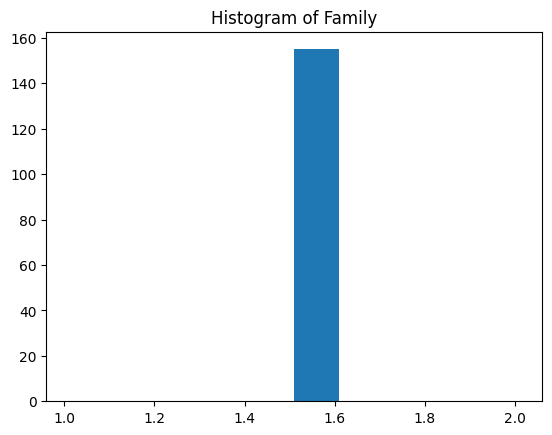

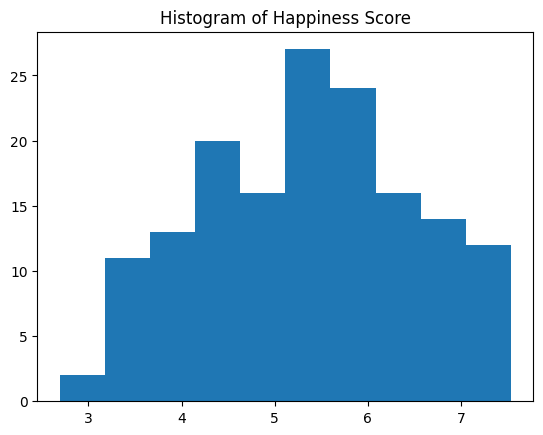

In [66]:
def plot_histogram(data, variable_name):
    _ = plt.hist(data, 10)
    plt.title("Histogram of " + variable_name)
    plt.show()


plot_histogram(inputs, 'Family')
plot_histogram(outputs, 'Happiness Score')

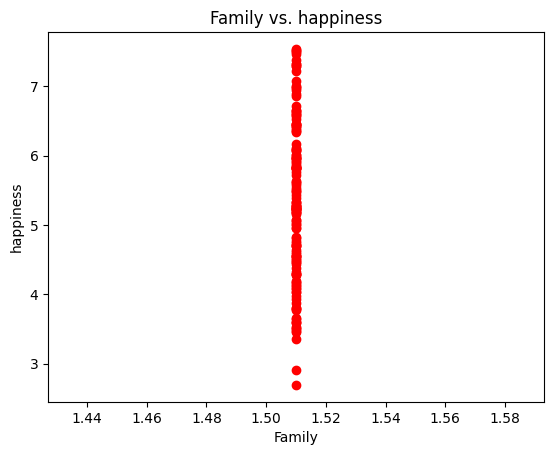

In [67]:
plt.plot(inputs, outputs, 'ro')
plt.xlabel('Family')
plt.ylabel('happiness')
plt.title('Family vs. happiness')
plt.show()

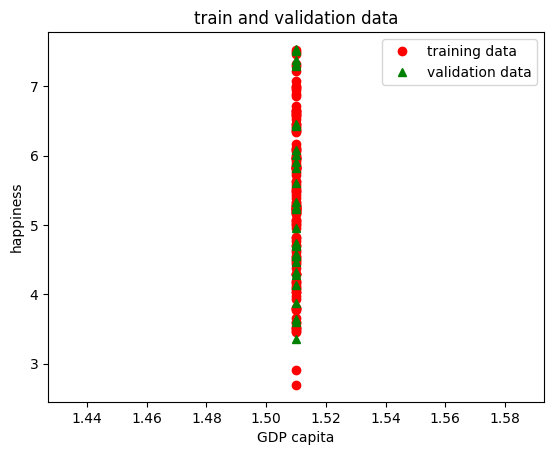

In [68]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
train_sample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
validation_sample = [i for i in indexes if not i in train_sample]

train_inputs = [inputs[i] for i in train_sample]
train_outputs = [outputs[i] for i in train_sample]

validation_inputs = [inputs[i] for i in validation_sample]
validation_outputs = [outputs[i] for i in validation_sample]

plt.plot(train_inputs, train_outputs, 'ro', label='training data')
plt.plot(validation_inputs, validation_outputs, 'g^',
         label='validation data')
plt.title('train and validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [69]:
xx = [[el] for el in train_inputs]

regressor = linear_model.LinearRegression()
regressor.fit(xx, train_outputs)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  0.4719180650554877  +  3.2328954364819484  * x


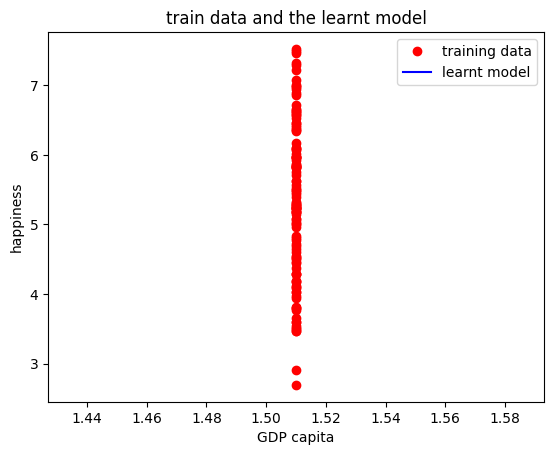

In [70]:
no_of_points = 1000
xref = []
val = min(train_inputs)
step = (max(train_inputs) - min(train_inputs)) / no_of_points
for i in range(1, no_of_points):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]

plt.plot(train_inputs, train_outputs, 'ro', label='training data') 
plt.plot(xref, yref, 'b-', label='learnt model') 
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

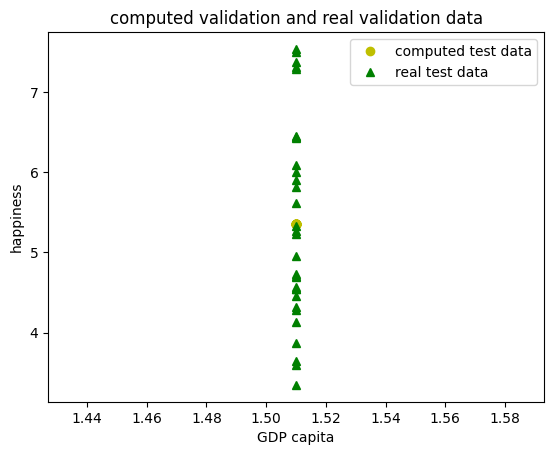

In [71]:
computed_validation_outputs = regressor.predict([[x] for x in validation_inputs])

plt.plot(validation_inputs, computed_validation_outputs, 'yo', label = 'computed test data')
plt.plot(validation_inputs, validation_outputs, 'g^', label = 'real test data') 
plt.title('computed validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

error = mean_squared_error(validation_outputs, computed_validation_outputs)
print('prediction error (tool):  ', error)
error2 = root_mean_squared_error(validation_outputs, computed_validation_outputs)
print('prediction error2 (tool with RMSE)', error2)

prediction error (tool):   1.488969965516146
prediction error2 (tool with RMSE) 1.2202335700660534
